In [15]:
import pandas as pd
import numpy as np
from pycaret.classification import *
from pycaret.regression import *
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [16]:
# Update these file paths to match your files
FEATURES_FILE1 = 'zeopp_final_results.csv'  # Your Zeo++ features
FEATURES_FILE2 = '../kernelPCA_soap_mofs.csv'
LABELS_FILE = '../id_labels.csv'           # Your labels file
TARGET_COL = 'label'         # Your target variable
selected_geometric = ["filename", "AV_fraction", "Df_A", "density_gcc", "AV_cm3_g", "SA_m2_g"]
# selected_geometric = ["filename"]

# Load data
print("Loading features...")
feat1 = pd.read_csv(FEATURES_FILE1)#[selected_geometric]
feat1["filename"] = feat1["filename"].astype(str).str.strip()
feat2 = pd.read_csv(FEATURES_FILE2)
feat2["filename"] = feat2["filename"].astype(str).str.strip(".cif")
features_df = pd.merge(feat1, feat2, on='filename', how='inner')

# Clean whitespace from filename column
features_df['filename'] = features_df['filename'].astype(str).str.strip()
print(f"Features shape: {features_df.shape}")
print(f"Feature columns: {list(features_df.columns)}")

print("\nLoading labels...")
labels_df = pd.read_csv(LABELS_FILE)
# Rename 'id' column to 'filename' to match features and clean whitespace
labels_df = labels_df.rename(columns={'id': 'filename'})
labels_df['filename'] = labels_df['filename'].astype(str).str.strip()
print(f"Labels shape: {labels_df.shape}")
print(f"Label columns: {list(labels_df.columns)}")

# Display first few rows
print("\nFirst 5 rows of features:")
display(features_df.head())

print("\nFirst 5 rows of labels:")
display(labels_df.head())

# Check if filenames match now
print("\nFilename matching check:")
print("Sample features filenames:", features_df['filename'].head(3).tolist())
print("Sample labels filenames:", labels_df['filename'].head(3).tolist())

Loading features...


Features shape: (3089, 498)
Feature columns: ['filename', 'Di_A', 'Df_A', 'Dif_A', 'density_gcc', 'unit_cell_volume_A3', 'SA_A2', 'SA_m2_cm3', 'SA_m2_g', 'AV_A3', 'AV_fraction', 'AV_cm3_g', 'num_channels', 'num_pockets', 'C-C_1', 'C-C_2', 'C-H_1', 'C-H_2', 'C-O_1', 'C-O_2', 'C-V_1', 'C-V_2', 'H-H_1', 'H-H_2', 'H-O_1', 'H-O_2', 'H-V_1', 'H-V_2', 'O-O_1', 'O-O_2', 'O-V_1', 'O-V_2', 'V-V_1', 'V-V_2', 'C-Zn_1', 'C-Zn_2', 'H-Zn_1', 'H-Zn_2', 'O-Zn_1', 'O-Zn_2', 'Zn-Zn_1', 'Zn-Zn_2', 'C-N_1', 'C-N_2', 'H-N_1', 'H-N_2', 'N-N_1', 'N-N_2', 'N-O_1', 'N-O_2', 'N-Zn_1', 'N-Zn_2', 'C-Er_1', 'C-Er_2', 'Er-Er_1', 'Er-Er_2', 'Er-H_1', 'Er-H_2', 'Er-O_1', 'Er-O_2', 'C-F_1', 'C-F_2', 'F-F_1', 'F-F_2', 'F-H_1', 'F-H_2', 'F-N_1', 'F-N_2', 'F-O_1', 'F-O_2', 'F-Zn_1', 'F-Zn_2', 'C-Cu_1', 'C-Cu_2', 'C-Li_1', 'C-Li_2', 'Cu-Cu_1', 'Cu-Cu_2', 'Cu-H_1', 'Cu-H_2', 'Cu-Li_1', 'Cu-Li_2', 'Cu-O_1', 'Cu-O_2', 'H-Li_1', 'H-Li_2', 'Li-Li_1', 'Li-Li_2', 'Li-O_1', 'Li-O_2', 'C-Fe_1', 'C-Fe_2', 'Fe-Fe_1', 'Fe-Fe_2', 'Fe-H

,filename,Di_A,Df_A,Dif_A,density_gcc,unit_cell_volume_A3,SA_A2,SA_m2_cm3,SA_m2_g,AV_A3,...,Dy-N_1,Dy-N_2,Dy-O_1,Dy-O_2,Al-F_1,Al-F_2,Br-Co_1,Br-Co_2,F-Ti_1,F-Ti_2
0,DB0-m12_o14_bcu_repeat,8.11451,5.51466,8.11451,0.720537,2922.000,632.0630,2163.120,3002.090,427.7810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,DB0-m12_o8_o32_tfz-d_repeat,16.18707,12.80705,15.79250,0.364317,7065.980,1242.8800,1758.970,4828.130,3585.2800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DB0-m15_o11_o140_f0_fsc_repeat,7.79926,5.38819,7.79926,0.720727,1673.670,357.1030,2133.650,2960.410,203.5190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,DB0-m15_o14_o137_f0_fsc_repeat,5.96666,5.50893,5.94287,1.102130,979.831,143.9140,1468.760,1332.660,102.8820,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,DB0-m15_o15_o48_f0_fsc_repeat,5.66157,5.37626,5.66157,1.247290,895.095,89.1508,995.992,798.527,38.8471,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



First 5 rows of labels:


,filename,label
0,DB5-hypotheticalMOF_17652_0_0_1_21_9_7_repeat,13.791591
1,DB0-m2_o8_o23_f0_pcu.sym.80_repeat,3.786996
2,DB0-m29_o90_o1500_f0_pts.sym.31_repeat,9.382537
3,DB0-m3_o48_o25_f0_fsc.sym.3_repeat,11.650365
4,DB0-m2_o1_o9_f0_nbo.sym.104_repeat,1.412915



Filename matching check:
Sample features filenames: ['DB0-m12_o14_bcu_repeat', 'DB0-m12_o8_o32_tfz-d_repeat', 'DB0-m15_o11_o140_f0_fsc_repeat']
Sample labels filenames: ['DB5-hypotheticalMOF_17652_0_0_1_21_9_7_repeat', 'DB0-m2_o8_o23_f0_pcu.sym.80_repeat', 'DB0-m29_o90_o1500_f0_pts.sym.31_repeat']


In [17]:
# columns = ["filename", "AV_fraction", "density_gcc", "AV_cm3_g", "SA_m2_g", "H-H_1", "Cu-H_1", "SA_m2_cm3", "Cu-Cu_1", "C-N_1", "N-Zn_1"]
# columns = ["filename", "AV_fraction", "Df_A", "density_gcc", "SA_m2_cm3", "AV_cm3_g", "unit_cell_volume_A3", "SA_m2_g", "SA_A2", "AV_A3", "Di_A", "Dif_A", "num_channels", "Cu-N_2", "C-N_2", "C-O_1"]
# columns = ["filename", "AV_fraction", "Df_A", "density_gcc", "SA_m2_cm3", "AV_cm3_g", "unit_cell_volume_A3", "SA_m2_g", "Li-Li_1", "Li-Li_2", "O-O_1", "C-Li_1", "N-N_2", "N-Zn_1", "H-Li_2"]
# # columns = ["filename", "AV_fraction", "Df_A", "density_gcc", "AV_cm3_g", "SA_m2_g", "Li-Li_1", "Li-Li_2", "O-O_1", "C-Li_1", "N-N_2", "N-Zn_1", "H-Li_2"]
# columns = ["filename", "AV_fraction", "Df_A", "density_gcc", "AV_cm3_g", "SA_m2_g", "Li-Li_1", "Li-Li_2", "O-O_1", "C-Li_1", "N-N_2", "N-Zn_1", "H-Li_2", "C-C_2", "N-N_1", "Li-O_1", "H-Li_1", "H-N_1", "Zn-Zn_1", "H-N_2", "C-N_2", "N-O_1", "C-C_1", "Fe-H_1"]


# features_df = features_df[columns]

In [18]:
# Merge datasets
print("Merging features and labels...")
merged_df = pd.merge(features_df, labels_df, on='filename', how='inner')
print(f"Merged data shape: {merged_df.shape}")
print(f"Successfully merged {len(merged_df)} samples")

# Check for any missing merges
feature_files = set(features_df['filename'])
label_files = set(labels_df['filename'])
print(f"\nFiles in features only: {len(feature_files - label_files)}")
print(f"Files in labels only: {len(label_files - feature_files)}")
print(f"Files in both: {len(feature_files.intersection(label_files))}")

display(merged_df.head())

Merging features and labels...
Merged data shape: (3089, 499)
Successfully merged 3089 samples

Files in features only: 0
Files in labels only: 0
Files in both: 3089


,filename,Di_A,Df_A,Dif_A,density_gcc,unit_cell_volume_A3,SA_A2,SA_m2_cm3,SA_m2_g,AV_A3,...,Dy-N_2,Dy-O_1,Dy-O_2,Al-F_1,Al-F_2,Br-Co_1,Br-Co_2,F-Ti_1,F-Ti_2,label
0,DB0-m12_o14_bcu_repeat,8.11451,5.51466,8.11451,0.720537,2922.000,632.0630,2163.120,3002.090,427.7810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.427428
1,DB0-m12_o8_o32_tfz-d_repeat,16.18707,12.80705,15.79250,0.364317,7065.980,1242.8800,1758.970,4828.130,3585.2800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.214721
2,DB0-m15_o11_o140_f0_fsc_repeat,7.79926,5.38819,7.79926,0.720727,1673.670,357.1030,2133.650,2960.410,203.5190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.199601
3,DB0-m15_o14_o137_f0_fsc_repeat,5.96666,5.50893,5.94287,1.102130,979.831,143.9140,1468.760,1332.660,102.8820,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.401891
4,DB0-m15_o15_o48_f0_fsc_repeat,5.66157,5.37626,5.66157,1.247290,895.095,89.1508,995.992,798.527,38.8471,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.446165


In [19]:
# Preprocess features
print("Preprocessing data...")

# Get feature columns (exclude filename and target)
feature_cols = [col for col in merged_df.columns if col not in ['filename', TARGET_COL]]
print(f"Feature columns ({len(feature_cols)}): {feature_cols}")

# Convert 'NA' strings to NaN and make numeric
for col in feature_cols:
    if merged_df[col].dtype == 'object':
        merged_df[col] = merged_df[col].replace('NA', np.nan)
        merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

# Check missing values
print("\nMissing values per column:")
missing_counts = merged_df[feature_cols + [TARGET_COL]].isnull().sum()
print(missing_counts[missing_counts > 0])

# Remove rows with missing target
initial_rows = len(merged_df)
merged_df = merged_df.dropna(subset=[TARGET_COL])
final_rows = len(merged_df)
print(f"\nRemoved {initial_rows - final_rows} rows with missing target values")
print(f"Final dataset size: {final_rows} samples")

Preprocessing data...
Feature columns (497): ['Di_A', 'Df_A', 'Dif_A', 'density_gcc', 'unit_cell_volume_A3', 'SA_A2', 'SA_m2_cm3', 'SA_m2_g', 'AV_A3', 'AV_fraction', 'AV_cm3_g', 'num_channels', 'num_pockets', 'C-C_1', 'C-C_2', 'C-H_1', 'C-H_2', 'C-O_1', 'C-O_2', 'C-V_1', 'C-V_2', 'H-H_1', 'H-H_2', 'H-O_1', 'H-O_2', 'H-V_1', 'H-V_2', 'O-O_1', 'O-O_2', 'O-V_1', 'O-V_2', 'V-V_1', 'V-V_2', 'C-Zn_1', 'C-Zn_2', 'H-Zn_1', 'H-Zn_2', 'O-Zn_1', 'O-Zn_2', 'Zn-Zn_1', 'Zn-Zn_2', 'C-N_1', 'C-N_2', 'H-N_1', 'H-N_2', 'N-N_1', 'N-N_2', 'N-O_1', 'N-O_2', 'N-Zn_1', 'N-Zn_2', 'C-Er_1', 'C-Er_2', 'Er-Er_1', 'Er-Er_2', 'Er-H_1', 'Er-H_2', 'Er-O_1', 'Er-O_2', 'C-F_1', 'C-F_2', 'F-F_1', 'F-F_2', 'F-H_1', 'F-H_2', 'F-N_1', 'F-N_2', 'F-O_1', 'F-O_2', 'F-Zn_1', 'F-Zn_2', 'C-Cu_1', 'C-Cu_2', 'C-Li_1', 'C-Li_2', 'Cu-Cu_1', 'Cu-Cu_2', 'Cu-H_1', 'Cu-H_2', 'Cu-Li_1', 'Cu-Li_2', 'Cu-O_1', 'Cu-O_2', 'H-Li_1', 'H-Li_2', 'Li-Li_1', 'Li-Li_2', 'Li-O_1', 'Li-O_2', 'C-Fe_1', 'C-Fe_2', 'Fe-Fe_1', 'Fe-Fe_2', 'Fe-H_1', 'Fe-H_2

Series([], dtype: int64)

Removed 0 rows with missing target values
Final dataset size: 3089 samples


Dataset statistics:


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

              Di_A         Df_A        Dif_A  density_gcc  \
count  3089.000000  3089.000000  3089.000000  3089.000000   
mean     10.890367     8.401731    10.806965     0.668806   
std       4.319139     3.349969     4.315285     0.277408   
min       3.274480     1.809160     2.286410     0.108428   
25%       8.098690     6.112580     7.978420     0.496353   
50%      10.002920     7.735730     9.899870     0.602883   
75%      12.666020     9.885780    12.652840     0.803620   
max      37.928760    35.543480    37.907590     2.205730   

       unit_cell_volume_A3        SA_A2    SA_m2_cm3      SA_m2_g  \
count          3089.000000  3089.000000  3089.000000  3089.000000   
mean           5698.629235   967.943074  1808.811247  3262.163543   
std            8100.329572  1091.591385   501.736094  1445.929729   
min             480.895000     0.000000     0.000000     0.000000   
25%            1996.090000   368.173000  1609.050000  2224.790000   
50%            3070.060000   649.143

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

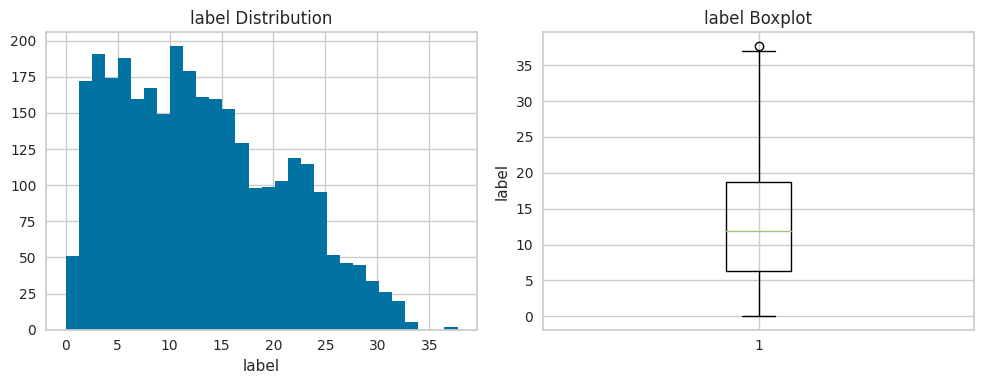

In [20]:
# Basic statistics
print("Dataset statistics:")
print(merged_df[feature_cols + [TARGET_COL]].describe())

# Target variable analysis
print(f"\nTarget variable: {TARGET_COL}")
if merged_df[TARGET_COL].dtype in ['int64', 'float64']:
    print("Target statistics:")
    print(merged_df[TARGET_COL].describe())
    
    # Plot target distribution
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    merged_df[TARGET_COL].hist(bins=30)
    plt.title(f'{TARGET_COL} Distribution')
    plt.xlabel(TARGET_COL)
    
    plt.subplot(1, 2, 2)
    plt.boxplot(merged_df[TARGET_COL])
    plt.title(f'{TARGET_COL} Boxplot')
    plt.ylabel(TARGET_COL)
    plt.tight_layout()
    plt.show()
else:
    print("Target value counts:")
    print(merged_df[TARGET_COL].value_counts())
    
    # Plot target distribution
    plt.figure(figsize=(8, 5))
    merged_df[TARGET_COL].value_counts().plot(kind='bar')
    plt.title(f'{TARGET_COL} Distribution')
    plt.xlabel(TARGET_COL)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [21]:
# Prepare final dataset for machine learning
ml_data = merged_df[[TARGET_COL] + feature_cols].copy()

print(f"ML dataset shape: {ml_data.shape}")
print(f"Features: {len(feature_cols)}")
print(f"Samples: {len(ml_data)}")

# Check final data quality
print("\nFinal data info:")
print(ml_data.info())

# Determine task type
target_unique = merged_df[TARGET_COL].nunique()
if merged_df[TARGET_COL].dtype in ['int64', 'float64'] and target_unique > 10:
    TASK_TYPE = 'regression'
    print(f"\nDetected REGRESSION task (continuous target with {target_unique} unique values)")
else:
    TASK_TYPE = 'classification'
    print(f"\nDetected CLASSIFICATION task ({target_unique} classes)")

print(f"Task type: {TASK_TYPE}")

ML dataset shape: (3089, 498)
Features: 497
Samples: 3089

Final data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3089 entries, 0 to 3088
Columns: 498 entries, label to F-Ti_2
dtypes: float64(496), int64(2)
memory usage: 11.7 MB
None

Detected REGRESSION task (continuous target with 3050 unique values)
Task type: regression


In [22]:
# Only run this cell if TASK_TYPE == 'regression'
if TASK_TYPE == 'regression':
    print("Setting up regression environment with normalization...")
    
    reg = setup(
            data=ml_data,
            target=TARGET_COL,
            train_size=0.8,
            session_id=123,
            # silent=True,
            # fold=5,
            # Minimal preprocessing
            # normalize=False,          # Only keep normalization
            # transformation=False,    # Disable transformation
            # remove_outliers=False,   # Disable outlier removal
            # feature_selection=False, # Disable feature selection
        )
    
    print("Regression setup complete with preprocessing!")

Setting up regression environment with normalization...


,Description,Value
0,Session id,123
1,Target,label
2,Target type,Regression
3,Original data shape,"(3089, 498)"
4,Transformed data shape,"(3089, 498)"
5,Transformed train set shape,"(2471, 498)"
6,Transformed test set shape,"(618, 498)"
7,Numeric features,497
8,Preprocess,True
9,Imputation type,simple


Regression setup complete with preprocessing!


In [23]:
# Check what preprocessing was applied
print("=== PREPROCESSING SUMMARY ===")
print("\nDataset shape after preprocessing:")
print(f"Training features: {get_config('X_train').shape}")
print(f"Test features: {get_config('X_test').shape}")

# Show what transformations were applied
print(f"\nFeatures after preprocessing: {len(get_config('X_train').columns)}")
print(f"Original features: {len(feature_cols)}")

if len(get_config('X_train').columns) != len(feature_cols):
    print(f"Feature selection removed: {len(feature_cols) - len(get_config('X_train').columns)} features")

# Show sample of processed data
print("\nSample of preprocessed training data:")
display(get_config('X_train').head())

print("\nPreprocessed data statistics:")
display(get_config('X_train').describe())

# Check if normalization worked (should have mean~0, std~1)
means = get_config('X_train').mean()
stds = get_config('X_train').std()
print(f"\nNormalization check:")
print(f"Feature means range: {means.min():.3f} to {means.max():.3f} (should be near 0)")
print(f"Feature stds range: {stds.min():.3f} to {stds.max():.3f} (should be near 1)")

=== PREPROCESSING SUMMARY ===

Dataset shape after preprocessing:


Training features: (2471, 497)
Test features: (618, 497)

Features after preprocessing: 497
Original features: 497

Sample of preprocessed training data:


,Di_A,Df_A,Dif_A,density_gcc,unit_cell_volume_A3,SA_A2,SA_m2_cm3,SA_m2_g,AV_A3,AV_fraction,...,Dy-N_1,Dy-N_2,Dy-O_1,Dy-O_2,Al-F_1,Al-F_2,Br-Co_1,Br-Co_2,F-Ti_1,F-Ti_2
1738,6.336170,4.35059,6.324400,1.009480,1191.349976,153.046005,1284.640015,1272.579956,68.621696,0.0576,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2696,14.905330,13.26072,14.617260,0.358303,5037.180176,864.690002,1716.609985,4790.959961,2555.870117,0.5074,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2151,15.437510,11.49215,15.002120,0.282553,6806.109863,1072.920044,1576.400024,5579.129883,3985.659912,0.5856,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1768,7.657100,4.75101,7.605270,0.723776,3171.169922,452.809998,1427.900024,1972.849976,228.957993,0.0722,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2848,16.255671,12.68436,16.255671,0.405679,5765.279785,1053.040039,1826.530029,4502.390137,2842.280029,0.4930,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Preprocessed data statistics:


,Di_A,Df_A,Dif_A,density_gcc,unit_cell_volume_A3,SA_A2,SA_m2_cm3,SA_m2_g,AV_A3,AV_fraction,...,Dy-N_1,Dy-N_2,Dy-O_1,Dy-O_2,Al-F_1,Al-F_2,Br-Co_1,Br-Co_2,F-Ti_1,F-Ti_2
count,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,...,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2.471000e+03,2471.000000,2471.000000
mean,10.905416,8.415754,10.822668,0.665502,5707.386230,967.762329,1807.698486,3269.924805,2532.688721,0.281425,...,0.001885,-0.000025,0.000063,-0.000003,0.000291,-0.000029,-0.000091,7.327861e-07,-0.000515,0.000057
std,4.288625,3.338230,4.291929,0.274612,8123.075195,1101.343628,500.519043,1442.981934,5752.937012,0.165542,...,0.093720,0.001220,0.003142,0.000156,0.014459,0.001426,0.004536,3.642618e-05,0.025607,0.002826
min,3.274480,2.124780,3.274480,0.115486,480.894989,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-0.060653,0.000000,-0.007733,0.000000,-0.070898,-0.225474,0.000000e+00,-1.272922,0.000000
25%,8.119860,6.177800,8.015460,0.495770,2043.130005,370.181000,1610.854980,2250.844971,333.593506,0.162500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
50%,10.019670,7.743850,9.932150,0.600638,3068.979980,649.143005,1902.569946,3418.780029,842.359985,0.267600,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
75%,12.665345,9.857665,12.652840,0.800740,5067.155029,964.252014,2111.440063,4296.514893,1874.364990,0.379400,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
max,37.928761,35.543480,37.907589,2.146410,81731.500000,7474.970215,2998.820068,7197.319824,65548.601562,0.810600,...,4.658720,0.000000,0.156192,0.000000,0.718742,0.000000,0.000000,1.810714e-03,0.000000,0.140472



Normalization check:
Feature means range: -6.771 to 5707.386 (should be near 0)
Feature stds range: 0.000 to 8123.075 (should be near 1)


In [24]:
# Only run this cell if TASK_TYPE == 'regression'
if TASK_TYPE == 'regression':
    print("Comparing regression models...")
    
    # Compare multiple algorithms
    best_models = compare_models(
        include=['lr', 'rf', 'et', 'gbr', 'xgboost', 'dt'],
        sort='R2',
        n_select=5,  # Keep top 5 models
        verbose=True
    )
    
    print("Model comparison complete!")

Comparing regression models...


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.5378,5.5079,2.3371,0.9109,0.2371,0.3301,0.6320
xgboost,Extreme Gradient Boosting,1.6558,5.8411,2.4079,0.9052,0.2463,0.3238,0.2460
rf,Random Forest Regressor,1.6225,6.0278,2.4458,0.9024,0.2433,0.3489,0.9610
gbr,Gradient Boosting Regressor,1.9233,7.4049,2.7110,0.8801,0.2744,0.4836,0.5770
dt,Decision Tree Regressor,2.2732,12.3856,3.5077,0.7986,0.3378,0.3899,0.0690
lr,Linear Regression,5.2493,497.1449,15.5371,-7.3306,0.5465,1.3149,0.5100


Model comparison complete!


In [25]:
# Create the best performing model
print("Creating best model...")
best_model = create_model(best_models[0])

# Tune hyperparameters
print("\nTuning hyperparameters...")
tuned_model = tune_model(best_model, optimize='R2' if TASK_TYPE == 'regression' else 'Accuracy')

print("Model creation and tuning complete!")

Creating best model...


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6482,6.2319,2.4964,0.8998,0.2973,1.2887
1,1.4937,5.1285,2.2646,0.9116,0.2296,0.2047
2,1.6717,6.2206,2.4941,0.9101,0.2528,0.3881
3,1.5126,4.5942,2.1434,0.9257,0.2092,0.1954
4,1.4874,5.5498,2.3558,0.9075,0.2729,0.2440
5,1.2970,4.1718,2.0425,0.9279,0.1967,0.1665
6,1.5250,4.8513,2.2026,0.9124,0.2201,0.1983
7,1.6854,6.3274,2.5154,0.8942,0.2466,0.2205
8,1.3356,4.4196,2.1023,0.9329,0.1925,0.1677



Tuning hyperparameters...


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.2741,10.2343,3.1991,0.8354,0.3730,3.2857
1,2.0595,7.8727,2.8058,0.8643,0.2916,0.3056
2,2.2605,9.5360,3.0880,0.8622,0.3061,0.6193
3,2.3635,9.1884,3.0312,0.8514,0.2978,0.3300
4,2.2620,10.4018,3.2252,0.8267,0.3494,0.3806
5,2.0327,7.4637,2.7320,0.8711,0.2708,0.2882
6,2.1389,8.3982,2.8980,0.8484,0.2902,0.3002
7,2.2369,9.5049,3.0830,0.8411,0.2988,0.3014
8,2.0925,9.0095,3.0016,0.8631,0.2888,0.3006


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Model creation and tuning complete!


In [26]:
# Evaluate the tuned model
print("Evaluating model performance...")
evaluate_model(tuned_model)

Evaluating model performance...


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

Analyzing feature importance...
PyCaret feature importance not available for this model. Using alternative method...

Tree-based Feature Importance:
         Feature  Importance
9    AV_fraction    0.096716
6      SA_m2_cm3    0.082157
7        SA_m2_g    0.061525
3    density_gcc    0.057014
74        C-Li_2    0.054137
83        H-Li_1    0.050122
10      AV_cm3_g    0.048494
86       Li-Li_2    0.043910
84        H-Li_2    0.037517
0           Di_A    0.033626
85       Li-Li_1    0.032618
2          Dif_A    0.032148
117       Li-N_1    0.028138
73        C-Li_1    0.025329
5          SA_A2    0.023944


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

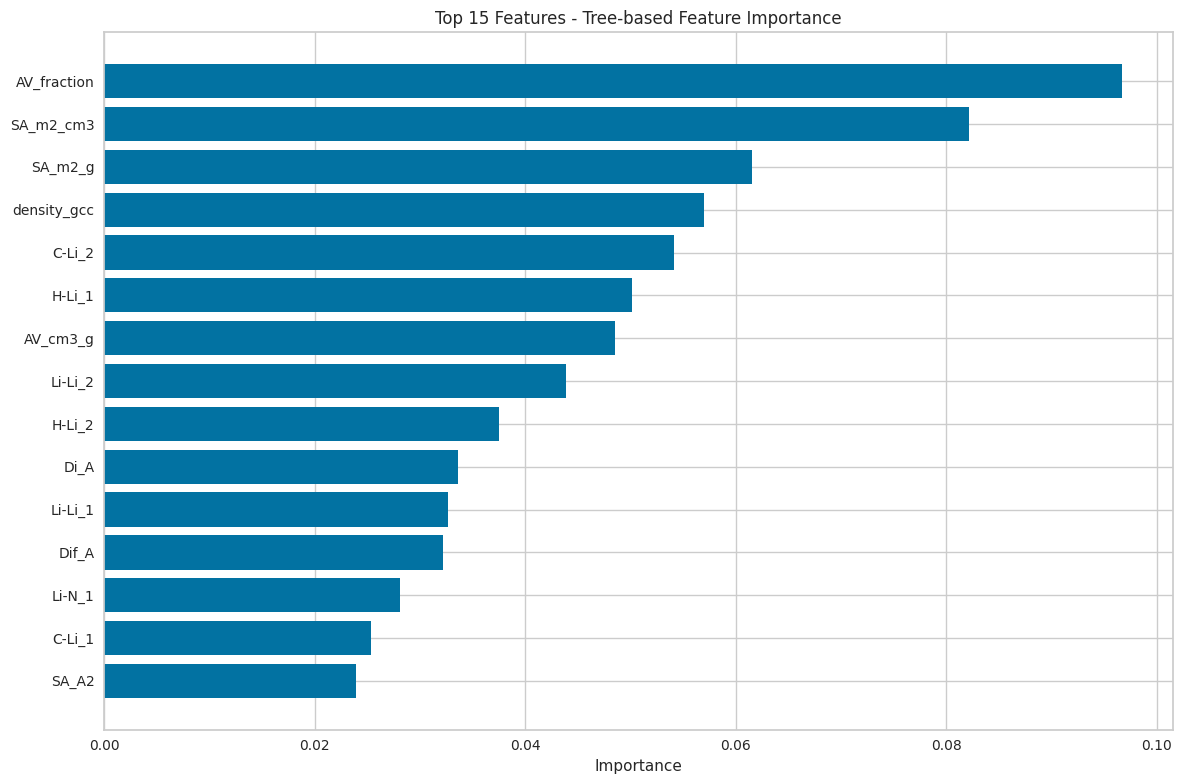


Feature importance saved to: feature_importance.csv

Calculating permutation importance (this may take a moment)...


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo


Permutation Importance (Top 15):
                 Feature  Importance_Mean  Importance_Std
9            AV_fraction         0.106897        0.010772
3            density_gcc         0.072721        0.003240
7                SA_m2_g         0.050994        0.004746
6              SA_m2_cm3         0.032428        0.004345
10              AV_cm3_g         0.017795        0.003960
86               Li-Li_2         0.017465        0.004141
84                H-Li_2         0.015464        0.003700
83                H-Li_1         0.014329        0.003666
74                C-Li_2         0.014203        0.003480
2                  Dif_A         0.013552        0.003511
0                   Di_A         0.012143        0.002402
85               Li-Li_1         0.009429        0.002940
4    unit_cell_volume_A3         0.007001        0.003941
73                C-Li_1         0.005135        0.002296
117               Li-N_1         0.005039        0.000944


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

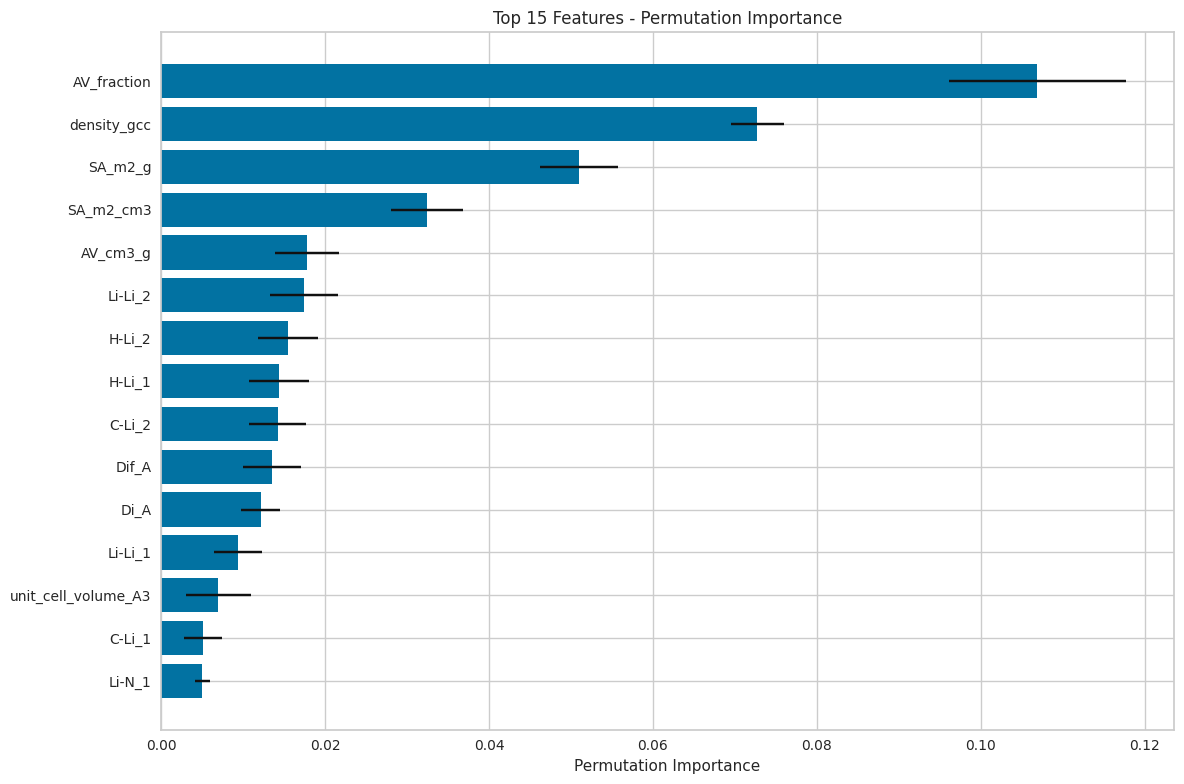


Permutation importance saved to: permutation_importance.csv

Feature importance analysis complete!


In [27]:
# Feature importance analysis
print("Analyzing feature importance...")

try:
    # Try using PyCaret's built-in feature importance
    if TASK_TYPE == 'classification':
        plot_model(tuned_model, plot='feature', display_format='streamlit')
    else:
        plot_model(tuned_model, plot='feature', display_format='streamlit')
except:
    print("PyCaret feature importance not available for this model. Using alternative method...")
    
    # Alternative: Extract feature importance from the model directly
    try:
        # Get the actual sklearn model
        sklearn_model = tuned_model
        
        # Extract feature importance based on model type
        if hasattr(sklearn_model, 'feature_importances_'):
            # Tree-based models (RF, XGBoost, etc.)
            importance_scores = sklearn_model.feature_importances_
            importance_type = "Tree-based Feature Importance"
        elif hasattr(sklearn_model, 'coef_'):
            # Linear models
            importance_scores = np.abs(sklearn_model.coef_).flatten()
            importance_type = "Coefficient Magnitude"
        else:
            print("Feature importance not available for this model type")
            importance_scores = None
        
        if importance_scores is not None:
            # Create feature importance DataFrame
            feature_importance_df = pd.DataFrame({
                'Feature': feature_cols,
                'Importance': importance_scores
            }).sort_values('Importance', ascending=False)
            
            print(f"\n{importance_type}:")
            print(feature_importance_df.head(15))
            
            # Plot feature importance
            plt.figure(figsize=(12, 8))
            top_features = feature_importance_df.head(15)
            plt.barh(range(len(top_features)), top_features['Importance'])
            plt.yticks(range(len(top_features)), top_features['Feature'])
            plt.xlabel('Importance')
            plt.title(f'Top 15 Features - {importance_type}')
            plt.gca().invert_yaxis()
            plt.tight_layout()
            plt.show()
            
            # Save feature importance
            feature_importance_df.to_csv('feature_importance.csv', index=False)
            print(f"\nFeature importance saved to: feature_importance.csv")
            
    except Exception as e:
        print(f"Could not extract feature importance: {e}")
        print("This might be a complex ensemble model where feature importance is not directly accessible")

# Alternative: Use permutation importance (works for any model)
try:
    from sklearn.inspection import permutation_importance
    print("\nCalculating permutation importance (this may take a moment)...")
    
    # Get test data
    X_test = get_config('X_test')
    y_test = get_config('y_test')
    
    # Calculate permutation importance
    perm_importance = permutation_importance(tuned_model, X_test, y_test, 
                                           n_repeats=5, random_state=123, n_jobs=-1)
    
    # Create DataFrame
    perm_importance_df = pd.DataFrame({
        'Feature': feature_cols,
        'Importance_Mean': perm_importance.importances_mean,
        'Importance_Std': perm_importance.importances_std
    }).sort_values('Importance_Mean', ascending=False)
    
    print("\nPermutation Importance (Top 15):")
    print(perm_importance_df.head(15))
    
    # Plot permutation importance
    plt.figure(figsize=(12, 8))
    top_perm_features = perm_importance_df.head(15)
    plt.barh(range(len(top_perm_features)), top_perm_features['Importance_Mean'],
             xerr=top_perm_features['Importance_Std'])
    plt.yticks(range(len(top_perm_features)), top_perm_features['Feature'])
    plt.xlabel('Permutation Importance')
    plt.title('Top 15 Features - Permutation Importance')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    # Save permutation importance
    perm_importance_df.to_csv('permutation_importance.csv', index=False)
    print(f"\nPermutation importance saved to: permutation_importance.csv")
    
except Exception as e:
    print(f"Could not calculate permutation importance: {e}")

print("\nFeature importance analysis complete!")

=== PREDICTIONS vs ACTUAL ===


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1.6402,6.8909,2.6251,0.8823,0.2524,0.2559


Test set predictions:


,Di_A,Df_A,Dif_A,density_gcc,unit_cell_volume_A3,SA_A2,SA_m2_cm3,SA_m2_g,AV_A3,AV_fraction,...,Dy-O_1,Dy-O_2,Al-F_1,Al-F_2,Br-Co_1,Br-Co_2,F-Ti_1,F-Ti_2,label,prediction_label
1916,20.397190,18.77846,20.39719,0.384214,7278.819824,1231.609985,1692.040039,4403.899902,3671.439941,0.5044,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.592038,5.212251
1449,16.231039,10.68621,15.80971,0.301757,18505.500000,2999.340088,1620.780029,5371.160156,11107.000000,0.6002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.990804,2.502624
2903,5.575890,4.58088,5.36098,0.678154,3120.550049,699.851990,2242.719971,3307.100098,233.417007,0.0748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.081667,14.955713
2405,11.034950,9.50196,11.03495,0.520497,3350.129883,666.442017,1989.300049,3821.929932,1209.400024,0.3610,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.887646,25.900121
289,8.753240,8.00350,8.75324,0.563422,3712.419922,804.572998,2167.250000,3846.590088,1037.989990,0.2796,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.521042,22.553661
134,8.090070,4.67875,8.09007,0.800711,2139.060059,391.251007,1829.079956,2284.320068,290.484009,0.1358,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.144391,13.453371
2082,11.663140,11.04095,11.66159,1.075010,4225.870117,606.533020,1435.290039,1335.140015,1144.369995,0.2708,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.774981,10.329158
235,10.552240,9.50500,10.55224,0.691097,2471.949951,436.975006,1767.729980,2557.870117,680.775024,0.2754,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.304096,16.951302
1785,9.899870,7.26234,9.89987,0.573004,2612.850098,506.143005,1937.130005,3380.659912,573.258972,0.2194,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.869122,17.211692
198,10.815340,8.89002,10.81534,0.502383,4341.939941,950.505005,2189.120117,4357.479980,1544.859985,0.3558,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.535263,18.876628


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0001,0.0000,0.0019,1.0000,0.0001,0.0000



Training set predictions:


,Di_A,Df_A,Dif_A,density_gcc,unit_cell_volume_A3,SA_A2,SA_m2_cm3,SA_m2_g,AV_A3,AV_fraction,...,Dy-O_1,Dy-O_2,Al-F_1,Al-F_2,Br-Co_1,Br-Co_2,F-Ti_1,F-Ti_2,label,prediction_label
1738,6.336170,4.350590,6.324400,1.009480,1191.349976,153.046005,1284.640015,1272.579956,68.621696,0.0576,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.937751,7.937751
2696,14.905330,13.260720,14.617260,0.358303,5037.180176,864.690002,1716.609985,4790.959961,2555.870117,0.5074,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.541527,22.541527
2151,15.437510,11.492150,15.002120,0.282553,6806.109863,1072.920044,1576.400024,5579.129883,3985.659912,0.5856,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.818160,2.818160
1768,7.657100,4.751010,7.605270,0.723776,3171.169922,452.809998,1427.900024,1972.849976,228.957993,0.0722,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.992709,10.992709
2848,16.255671,12.684360,16.255671,0.405679,5765.279785,1053.040039,1826.530029,4502.390137,2842.280029,0.4930,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.786558,2.786558
841,28.730650,18.307831,28.730650,0.181603,57910.000000,5673.250000,979.666016,5394.540039,44915.000000,0.7756,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.480794,1.480794
773,12.421620,6.485630,12.421620,0.682093,7293.669922,1589.699951,2179.560059,3195.399902,2083.070068,0.2856,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.023945,7.023945
1584,11.600440,7.981530,11.600440,0.565338,2382.689941,522.088013,2191.179932,3875.870117,871.585999,0.3658,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.601225,4.601225
994,9.803230,7.795750,9.783930,0.569044,1923.780029,406.841003,2114.800049,3716.409912,541.351990,0.2814,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.106829,21.106829
1456,13.778250,9.220610,13.778250,0.535158,5210.879883,1054.339966,2023.349976,3780.840088,1916.560059,0.3678,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.193730,6.193730


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo


=== REGRESSION METRICS ===
Test Set:
  MAE: 1.6402
  RMSE: 2.6251
  R²: 0.8823

Training Set:
  MAE: 0.0001
  RMSE: 0.0019
  R²: 1.0000


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

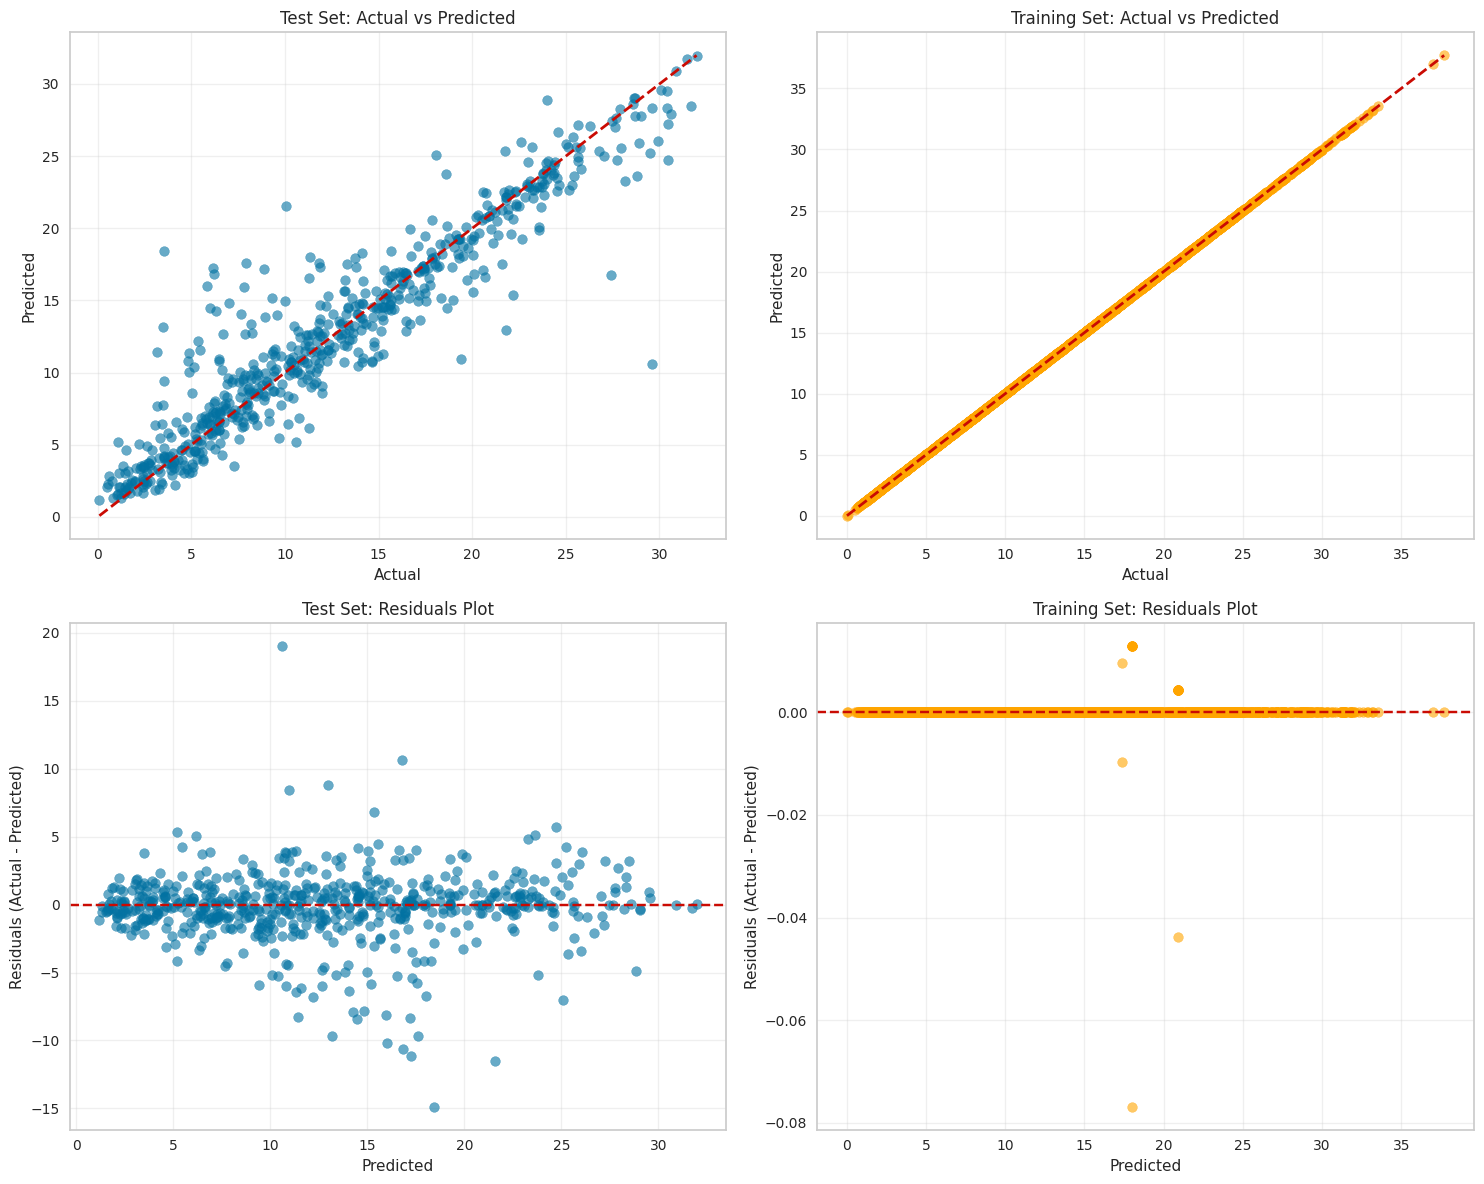


Predictions saved:
- test_predictions.csv (618 samples)
- train_predictions.csv (2471 samples)


In [28]:
# Get predictions on both training and test sets
print("=== PREDICTIONS vs ACTUAL ===")

# Get test set predictions (this includes actual vs predicted)
test_predictions = predict_model(tuned_model)
print("Test set predictions:")
display(test_predictions.head(10))

# Get training set predictions
train_predictions = predict_model(tuned_model, data=get_config('X_train').assign(**{TARGET_COL: get_config('y_train')}))
print("\nTraining set predictions:")
display(train_predictions.head(10))

# Create comparison plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

if TASK_TYPE == 'regression':
    # For regression: scatter plots of actual vs predicted
    
    # Test set
    axes[0,0].scatter(test_predictions[TARGET_COL], test_predictions['prediction_label'], alpha=0.6)
    axes[0,0].plot([test_predictions[TARGET_COL].min(), test_predictions[TARGET_COL].max()], 
                   [test_predictions[TARGET_COL].min(), test_predictions[TARGET_COL].max()], 'r--', lw=2)
    axes[0,0].set_xlabel('Actual')
    axes[0,0].set_ylabel('Predicted')
    axes[0,0].set_title('Test Set: Actual vs Predicted')
    axes[0,0].grid(True, alpha=0.3)
    
    # Training set
    axes[0,1].scatter(train_predictions[TARGET_COL], train_predictions['prediction_label'], alpha=0.6, color='orange')
    axes[0,1].plot([train_predictions[TARGET_COL].min(), train_predictions[TARGET_COL].max()], 
                   [train_predictions[TARGET_COL].min(), train_predictions[TARGET_COL].max()], 'r--', lw=2)
    axes[0,1].set_xlabel('Actual')
    axes[0,1].set_ylabel('Predicted')
    axes[0,1].set_title('Training Set: Actual vs Predicted')
    axes[0,1].grid(True, alpha=0.3)
    
    # Residuals plots
    test_residuals = test_predictions[TARGET_COL] - test_predictions['prediction_label']
    train_residuals = train_predictions[TARGET_COL] - train_predictions['prediction_label']
    
    axes[1,0].scatter(test_predictions['prediction_label'], test_residuals, alpha=0.6)
    axes[1,0].axhline(y=0, color='r', linestyle='--')
    axes[1,0].set_xlabel('Predicted')
    axes[1,0].set_ylabel('Residuals (Actual - Predicted)')
    axes[1,0].set_title('Test Set: Residuals Plot')
    axes[1,0].grid(True, alpha=0.3)
    
    axes[1,1].scatter(train_predictions['prediction_label'], train_residuals, alpha=0.6, color='orange')
    axes[1,1].axhline(y=0, color='r', linestyle='--')
    axes[1,1].set_xlabel('Predicted')
    axes[1,1].set_ylabel('Residuals (Actual - Predicted)')
    axes[1,1].set_title('Training Set: Residuals Plot')
    axes[1,1].grid(True, alpha=0.3)
    
    # Print metrics
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    print(f"\n=== REGRESSION METRICS ===")
    print(f"Test Set:")
    print(f"  MAE: {mean_absolute_error(test_predictions[TARGET_COL], test_predictions['prediction_label']):.4f}")
    print(f"  RMSE: {np.sqrt(mean_squared_error(test_predictions[TARGET_COL], test_predictions['prediction_label'])):.4f}")
    print(f"  R²: {r2_score(test_predictions[TARGET_COL], test_predictions['prediction_label']):.4f}")
    
    print(f"\nTraining Set:")
    print(f"  MAE: {mean_absolute_error(train_predictions[TARGET_COL], train_predictions['prediction_label']):.4f}")
    print(f"  RMSE: {np.sqrt(mean_squared_error(train_predictions[TARGET_COL], train_predictions['prediction_label'])):.4f}")
    print(f"  R²: {r2_score(train_predictions[TARGET_COL], train_predictions['prediction_label']):.4f}")

else:
    # For classification: confusion matrices and distribution plots
    from sklearn.metrics import confusion_matrix, classification_report
    import seaborn as sns
    
    # Test set confusion matrix
    test_cm = confusion_matrix(test_predictions[TARGET_COL], test_predictions['prediction_label'])
    sns.heatmap(test_cm, annot=True, fmt='d', ax=axes[0,0], cmap='Blues')
    axes[0,0].set_title('Test Set: Confusion Matrix')
    axes[0,0].set_xlabel('Predicted')
    axes[0,0].set_ylabel('Actual')
    
    # Training set confusion matrix
    train_cm = confusion_matrix(train_predictions[TARGET_COL], train_predictions['prediction_label'])
    sns.heatmap(train_cm, annot=True, fmt='d', ax=axes[0,1], cmap='Oranges')
    axes[0,1].set_title('Training Set: Confusion Matrix')
    axes[0,1].set_xlabel('Predicted')
    axes[0,1].set_ylabel('Actual')
    
    # Class distribution comparison
    test_actual = test_predictions[TARGET_COL].value_counts().sort_index()
    test_predicted = test_predictions['prediction_label'].value_counts().sort_index()
    
    x_pos = np.arange(len(test_actual))
    width = 0.35
    axes[1,0].bar(x_pos - width/2, test_actual.values, width, label='Actual', alpha=0.7)
    axes[1,0].bar(x_pos + width/2, test_predicted.values, width, label='Predicted', alpha=0.7)
    axes[1,0].set_xlabel('Classes')
    axes[1,0].set_ylabel('Count')
    axes[1,0].set_title('Test Set: Class Distribution')
    axes[1,0].set_xticks(x_pos)
    axes[1,0].set_xticklabels(test_actual.index)
    axes[1,0].legend()
    
    # Training set class distribution
    train_actual = train_predictions[TARGET_COL].value_counts().sort_index()
    train_predicted = train_predictions['prediction_label'].value_counts().sort_index()
    
    x_pos = np.arange(len(train_actual))
    axes[1,1].bar(x_pos - width/2, train_actual.values, width, label='Actual', alpha=0.7)
    axes[1,1].bar(x_pos + width/2, train_predicted.values, width, label='Predicted', alpha=0.7)
    axes[1,1].set_xlabel('Classes')
    axes[1,1].set_ylabel('Count')
    axes[1,1].set_title('Training Set: Class Distribution')
    axes[1,1].set_xticks(x_pos)
    axes[1,1].set_xticklabels(train_actual.index)
    axes[1,1].legend()
    
    # Print classification reports
    print(f"\n=== CLASSIFICATION METRICS ===")
    print(f"Test Set Classification Report:")
    print(classification_report(test_predictions[TARGET_COL], test_predictions['prediction_label']))
    
    print(f"\nTraining Set Classification Report:")
    print(classification_report(train_predictions[TARGET_COL], train_predictions['prediction_label']))

plt.tight_layout()
plt.show()

# Save predictions to CSV files
test_predictions.to_csv('test_predictions.csv', index=False)
train_predictions.to_csv('train_predictions.csv', index=False)
print(f"\nPredictions saved:")
print(f"- test_predictions.csv ({len(test_predictions)} samples)")
print(f"- train_predictions.csv ({len(train_predictions)} samples)")